In [1]:
import numpy as np
import pandas as pd

In [2]:
subway_failure_data= pd.read_excel("C:\\Users\\abhi0\\Downloads\\ttc-subway-delay-jan-2014-april-2017.xlsx")

In [6]:
subway_failure_data.shape

(69016, 10)

In [4]:
subway_failure_data.describe()

,Min Delay,Min Gap,Vehicle
count,69016.000000,69016.000000,69016.000000
mean,1.820824,2.687783,4035.663382
std,8.800816,8.775565,2337.464972
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3006.000000
50%,0.000000,0.000000,5206.000000
75%,3.000000,5.000000,5526.000000
max,999.000000,999.000000,30009.000000


In [98]:
q = subway_failure_data["Min Delay"].quantile(0.9999)
q

346.62949999966077

In [99]:
df=subway_failure_data[subway_failure_data["Min Delay"] < q]

In [100]:
df.shape


(69009, 10)

In [107]:
q_low = subway_failure_data["Min Delay"].quantile(0.01111)
q_hi  = subway_failure_data["Min Delay"].quantile(0.999999)

df_filtered = subway_failure_data[(subway_failure_data["Min Delay"] < q_hi) & (subway_failure_data["Min Delay"] > q_low)]

In [108]:
df_filtered.shape

(18710, 10)

In [91]:
df_outlier = subway_failure_data[subway_failure_data["Min Delay"] > q]

In [92]:
df_outlier.shape

(657, 10)

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

In [111]:
df_filtered.groupby('Code')['Min Delay'].mean()

Code
ERAC     11.166667
ERBO      4.000000
ERCO     10.800000
ERDB      9.321429
ERDO      5.595506
           ...    
TUSC      3.782946
TUSET     3.615385
TUST      4.400000
TUSUP     5.594595
TUTD      3.000000
Name: Min Delay, Length: 168, dtype: float64

In [112]:
df9=df_filtered.groupby('Code')['Min Delay'].mean().sort_values(ascending=False)
df9

Code
ERHV     189.250000
MUFM     145.363636
PUTS      93.400000
MUPLA     71.454545
MUPR1     65.237500
            ...    
MUPAA      3.524938
EUCH       3.500000
PUMEL      3.500000
TUTD       3.000000
MUNCA      1.000000
Name: Min Delay, Length: 168, dtype: float64

In [123]:
l=list(df9[:20].index)

In [124]:
s=0
for i in l:
    s=s+df9[i]
    

In [126]:
print(s/20)

48.83172366725415


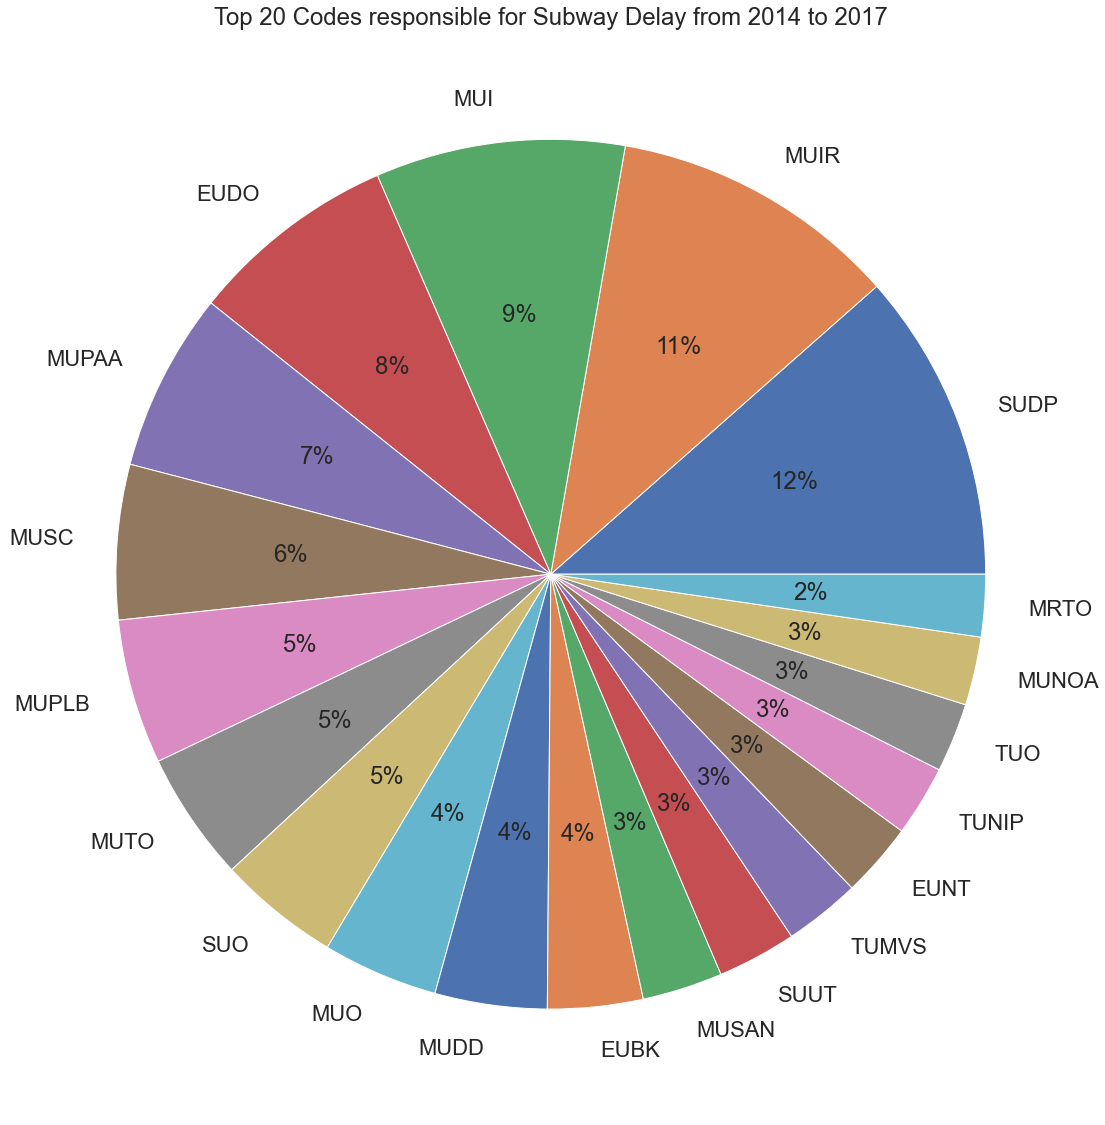

In [116]:
plt.pie(df_filtered.Code.value_counts()[:20],labels=df_filtered.Code.value_counts()[:20].index,autopct='%.0f%%')
plt.title('Top 20 Codes responsible for Subway Delay from 2014 to 2017');

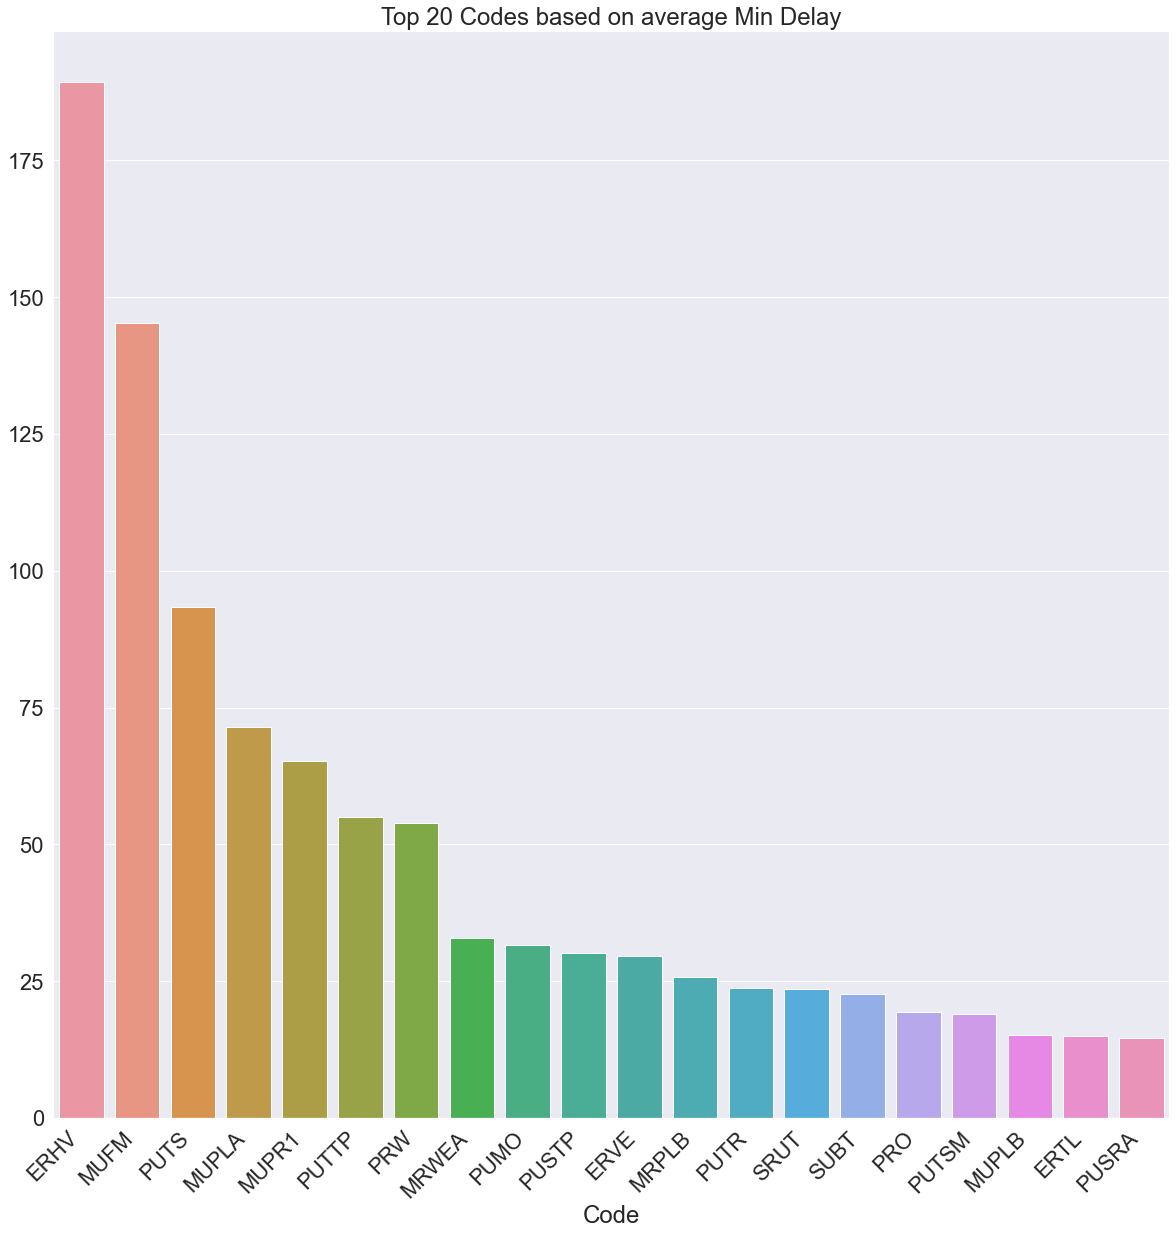

In [121]:
df2 = df_filtered.groupby('Code')['Min Delay'].mean().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(20, 20))
sns.barplot(x = df2[:20].index, y = df2[:20].values).set(title='Top 20 Codes based on average Min Delay')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
plt.show()


In [128]:
df5 = df_filtered.loc[df_filtered['Code'] == 'TUCC']

C:\Users\abhi0\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


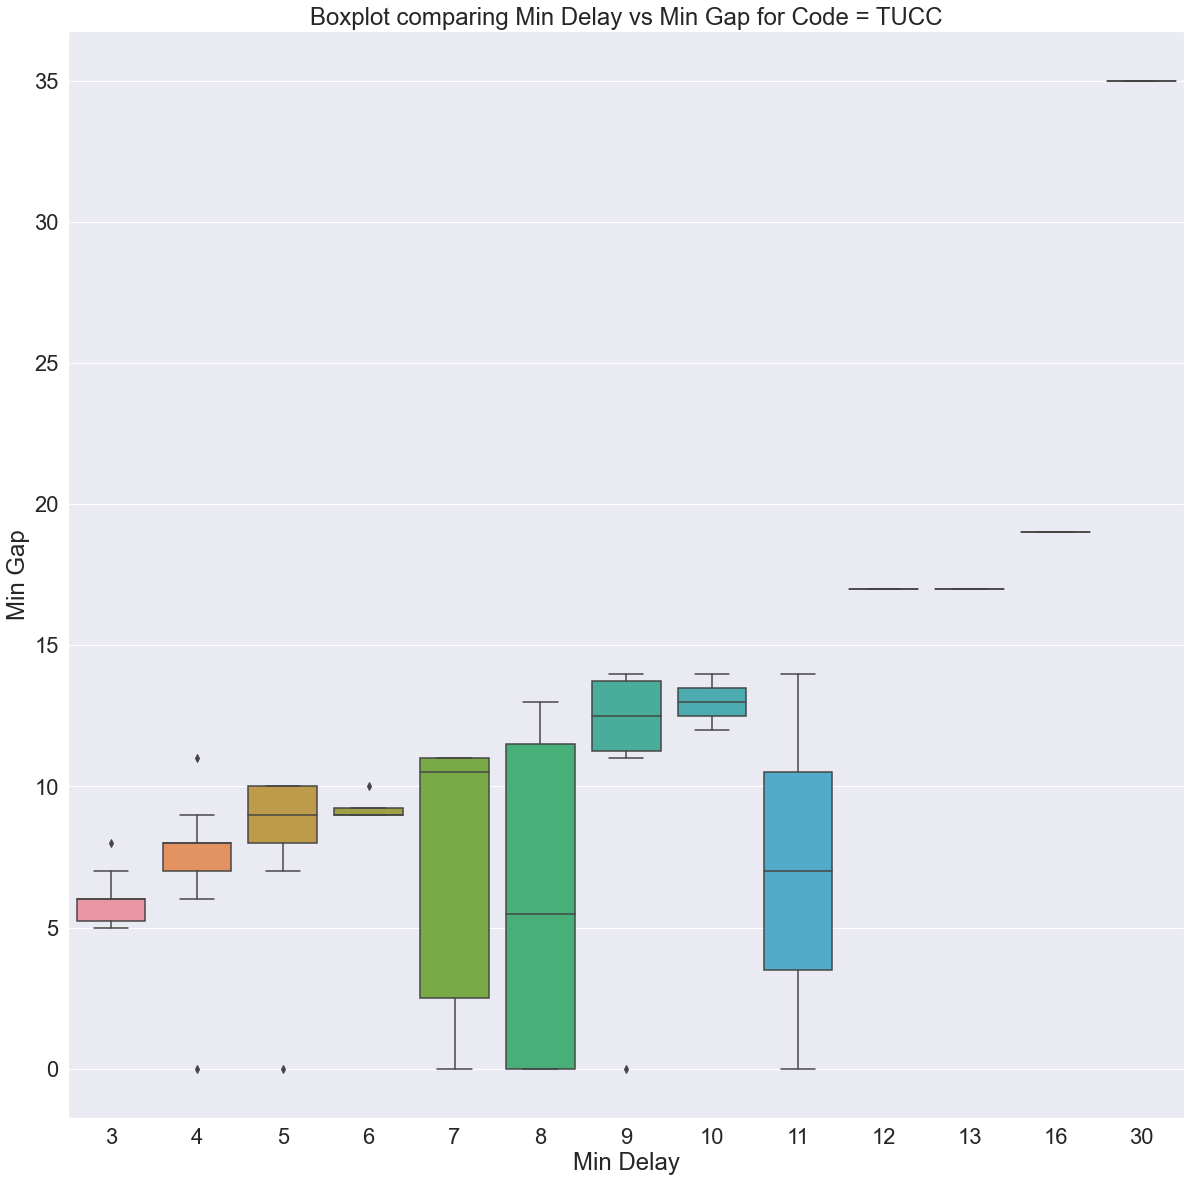

In [129]:
sns.set(font_scale = 2)
sns.boxplot(df5['Min Delay'],df5['Min Gap']).set(title='Boxplot comparing Min Delay vs Min Gap for Code = TUCC');

In [64]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [65]:
labelencoder = LabelEncoder() 

In [66]:
df_filtered['Code_N']=labelencoder.fit_transform(df_filtered['Code'])

C:\Users\abhi0\AppData\Local\Temp\ipykernel_28728\294929897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Code_N']=labelencoder.fit_transform(df_filtered['Code'])


In [67]:
df_filtered

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,Code_N
1,2014-01-01,02:06,Wednesday,HIGH PARK STATION,SUDP,3,7,W,BD,5001,137
3,2014-01-01,03:10,Wednesday,LANSDOWNE STATION,SUDP,3,8,W,BD,5116,137
4,2014-01-01,03:20,Wednesday,BLOOR STATION,MUSAN,5,10,S,YU,5386,80
12,2014-01-01,08:48,Wednesday,KIPLING STATION,MUNOA,5,0,E,BD,0,73
13,2014-01-01,08:49,Wednesday,YONGE SHP STATION,MUNOA,6,12,E,SHP,5276,73
...,...,...,...,...,...,...,...,...,...,...,...
68993,2017-04-29,22:22,Saturday,MAIN STREET STATION,SUDP,3,7,E,BD,5292,137
68997,2017-04-30,08:32,Sunday,DONLANDS STATION,MUO,4,9,W,BD,5210,74
68999,2017-04-30,08:52,Sunday,GREENWOOD STATION,MUO,4,8,E,BD,5099,74
69007,2017-04-30,18:10,Sunday,EGLINTON STATION,EUPI,4,8,N,YU,5641,40


In [69]:
X = df_filtered.loc[:,['Code_N','Min Gap','Vehicle']]

In [70]:
y = df_filtered.loc[:,['Min Delay']]

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [72]:
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [73]:
regressor.score(X_test,y_test)

0.8107968002308504

In [74]:
regressor.predict([X_test.iloc[100]])

C:\Users\abhi0\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([4.])